### Import Libraries


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Load Dataset

In [101]:
data = pd.read_csv('../Data/Dataset_ecommerce.csv')
data.head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
5,536365,2010-12-01 08:26:00,17850.0,SC7895,Toys,41,45.31,Sierra Leone
6,536365,2010-12-01 08:26:00,17850.0,SC8608,Books,44,39.31,Benin
7,536366,2010-12-01 08:28:00,17850.0,SC3216,Toys,47,77.35,Burkina Faso
8,536366,2010-12-01 08:28:00,17850.0,SC1236,Kitchenware,19,35.11,Nigeria
9,536367,2010-12-01 08:34:00,13047.0,SC4513,Furniture,55,3.21,Cote d'Ivoire


In [42]:
#descriptive statistics
data.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [44]:
#Check for missing values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [47]:
#drop missing value
data.dropna(inplace=True)

In [49]:
#checking more info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [138]:
#convert to Datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

### Exploratory Data Analysis

In [141]:
#Analysis by country
quantity_by_country = data.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country

,Country,Quantity
0,Algeria,973733
1,Benin,989802
2,Burkina Faso,975674
3,Cameroon,975400
4,Cote d'Ivoire,993238
5,Egypt,970530
6,Ethiopia,982073
7,Ghana,978250
8,Kenya,975355
9,Libya,978391


In [143]:
#Arranging the country in ascending order
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending=False)
quantity_by_country.head(10)

,Country,Quantity
4,Cote d'Ivoire,993238
1,Benin,989802
23,Togo,988370
20,South Africa,987630
27,Zimbabwe,983769
15,Nigeria,983413
16,Rwanda,982491
6,Ethiopia,982073
18,Sierra Leone,980644
21,Sudan,979138


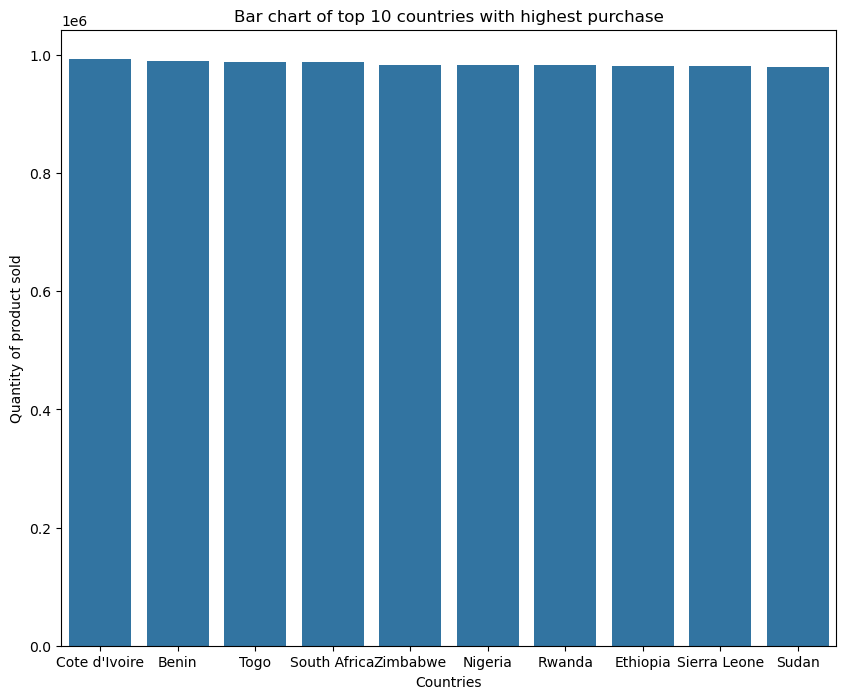

In [145]:
#Visualised Top_10 countries where most product sold

top_10_country = quantity_by_country.head(10)
plt.figure(figsize=(10,8))
ax = sns.barplot(x = 'Country', y = 'Quantity', data = top_10_country)
plt.xlabel('Countries')
plt.ylabel('Quantity of product sold')
plt.title('Bar chart of top 10 countries with highest purchase')
plt.show()

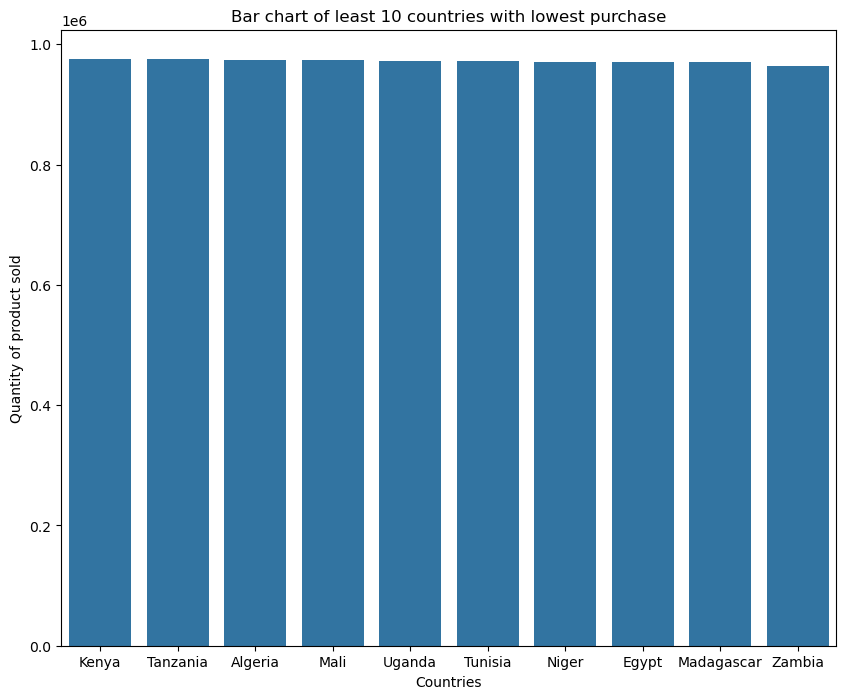

In [147]:
#To visualise the least 10 countries

least_10_country = quantity_by_country.tail(10)
plt.figure(figsize=(10,8))
ax = sns.barplot(x = 'Country', y = 'Quantity', data = least_10_country)
plt.xlabel('Countries')
plt.ylabel('Quantity of product sold')
plt.title('Bar chart of least 10 countries with lowest purchase')
plt.show()

### Analysis of Countries and No. of Customer 

In [150]:
country_to_customer = data.groupby(['Country'])['CustomerID'].nunique().reset_index()
country_to_customer = country_to_customer.sort_values('CustomerID', ascending = False).reset_index()

In [152]:
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


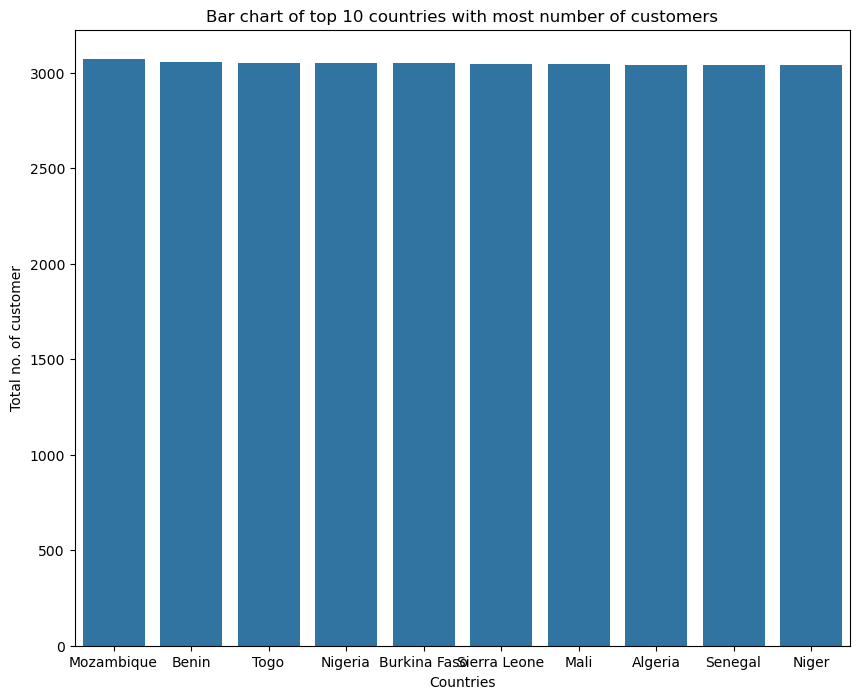

In [154]:
#Visualise top_10 countries with most No. of Customers

top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize=(10,8))
sns.barplot(x = 'Country', y = 'CustomerID', data = top_countries_to_customer)

plt.xlabel('Countries')
plt.ylabel('Total no. of customer')
plt.title('Bar chart of top 10 countries with most number of customers')
plt.show()

### Visualizing Sales Trend

In [161]:
#Grouping sales to monthly basis by summuring up the quantity sold every month.

monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period('M'))["Quantity"].sum()
monthly_sales

InvoiceDate
2010-12    2136405
2011-01    1778655
2011-02    1406427
2011-03    1857483
2011-04    1516733
2011-05    1866682
2011-06    1855719
2011-07    1999932
2011-08    1777279
2011-09    2540506
2011-10    3068669
2011-11    4290922
2011-12    1289823
Freq: M, Name: Quantity, dtype: int64

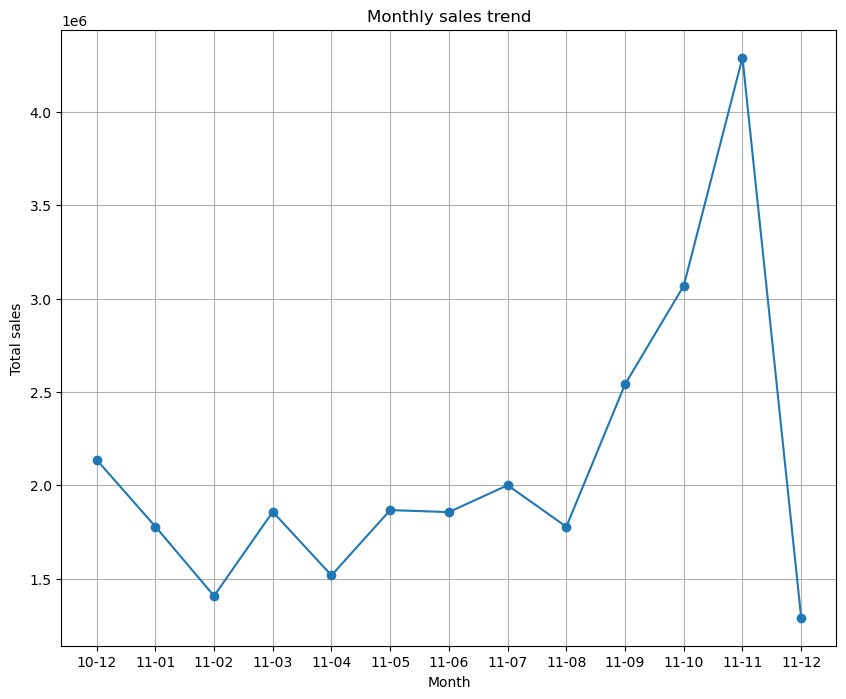

In [171]:
#Creating a Line plot
plt.figure(figsize=(10,8))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker= 'o', linestyle = '-')
plt.xlabel("Month")
plt.ylabel('Total sales')
plt.title("Monthly sales trend")
plt.grid(True)
plt.show()